In [47]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [71]:
IMAGE_SIZE = 256
BATCH_SIZE = 20
SHUFFLE = 10000
EPOCHS = 150
CHANNEL = 3

In [49]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "Cow disease Images Dataset",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
)

Found 572 files belonging to 11 classes.


In [50]:
class_names = df.class_names
class_names

['Carcinoma eye',
 'Cattle scab skin',
 'Corneal ulcer in eye',
 'Dermatophilosis  skin',
 'Lice Skin',
 'Lumpy Skin',
 'Normal Skin',
 'Ring Worm Skin',
 'Scab Mites Skin',
 'pink eye',
 'warts']

In [51]:
len(df)

29

In [52]:
for image_batch, label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(20, 256, 256, 3)
[10  6  4  0  7  5  9  6  9  6  0  4  6  3  4  6  6  9  5  1]


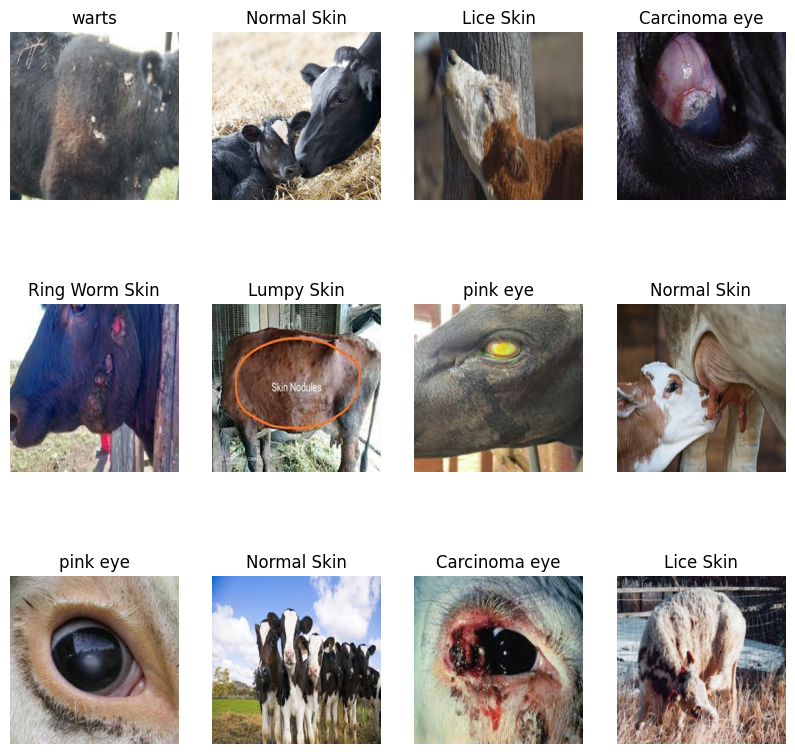

In [53]:
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[label_batch[i]])

In [54]:
def get_dataset_partitions_tf(df, train_split = 0.8, val_split=0.1, test_split= 0.1, shuffle_size = 10000 ):
    shuffle = SHUFFLE
    df_size = len(df)
    if shuffle:
       df =  df.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split * df_size)
    val_size = int(val_split * df_size)

    train_df = df.take(train_size)
    val_df = df.skip(train_size).take(val_size)
    test_df = df.skip(train_size).skip(val_size)
    return train_df, val_df, test_df

In [55]:
train_df, val_df, test_df = get_dataset_partitions_tf(df)

In [56]:
len(train_df)

23

In [57]:
len(test_df)

4

In [58]:
len(val_df)

2

In [59]:
## this is used to increase the loading speed of the dataset
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [60]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [61]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

In [67]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNEL)
n_classes = 12
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(n_classes ,activation='softmax'),
])
model.build(input_shape=input_shape)

In [68]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (20, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (20, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (20, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (20, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (20, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (20, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (20, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (20, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (20, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (20, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (20, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (20, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (20, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (20, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (20, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (20, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (20, 12)               │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,332 (720.05 KB)

 Trainable params: 184,332 (720.05 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile (
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [72]:
history = model.fit(
    train_df,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_df
)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2035 - loss: 2.2493 - val_accuracy: 0.2500 - val_loss: 2.3786
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2347 - loss: 2.1966 - val_accuracy: 0.3500 - val_loss: 2.2123
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2649 - loss: 2.1868 - val_accuracy: 0.3500 - val_loss: 2.1674
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2768 - loss: 2.1299 - val_accuracy: 0.3500 - val_loss: 2.1237
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3037 - loss: 2.0520 - val_accuracy: 0.3500 - val_loss: 1.9866
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.2724 - loss: 2.0248 - val_accuracy: 0.3500 - val_loss: 2.0720
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3278 - loss: 1.9932 - val_accuracy: 0.3750 - val_loss: 1.9928
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3361 - loss: 1.9076 - val_accuracy: 0.3750 - v

In [73]:
scores = model.evaluate(test_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.7033 - loss: 1.2786


In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

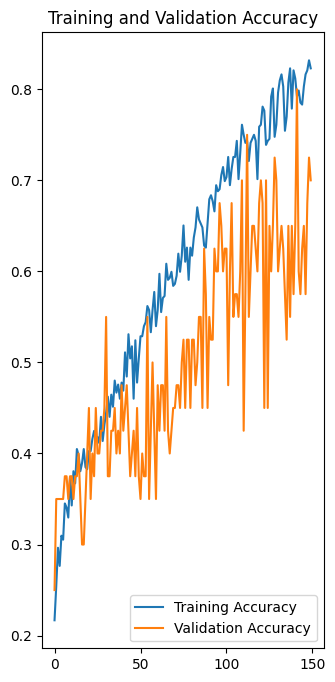

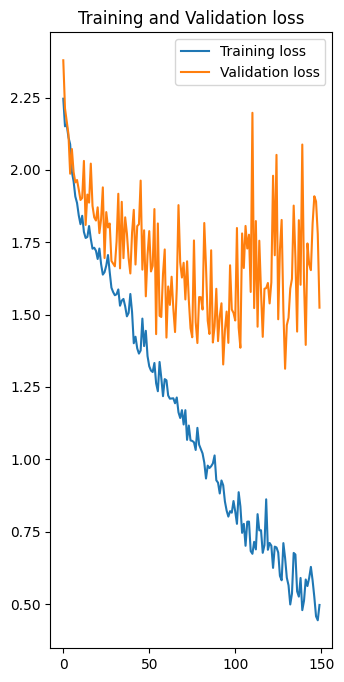

In [75]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss , label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

first image to predict
first image actual label:  Corneal ulcer in eye


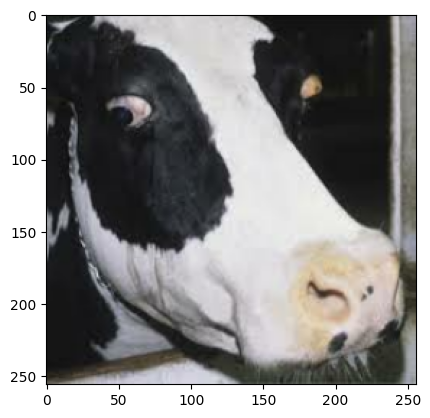

In [78]:
for image_batch, label_batch in test_df.take(1):
    first_image = image_batch[9].numpy().astype('uint8')
    first_label = label_batch[9].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print('first image actual label: ', class_names[first_label])

In [79]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])), 2)
    return predicted_class, confidence

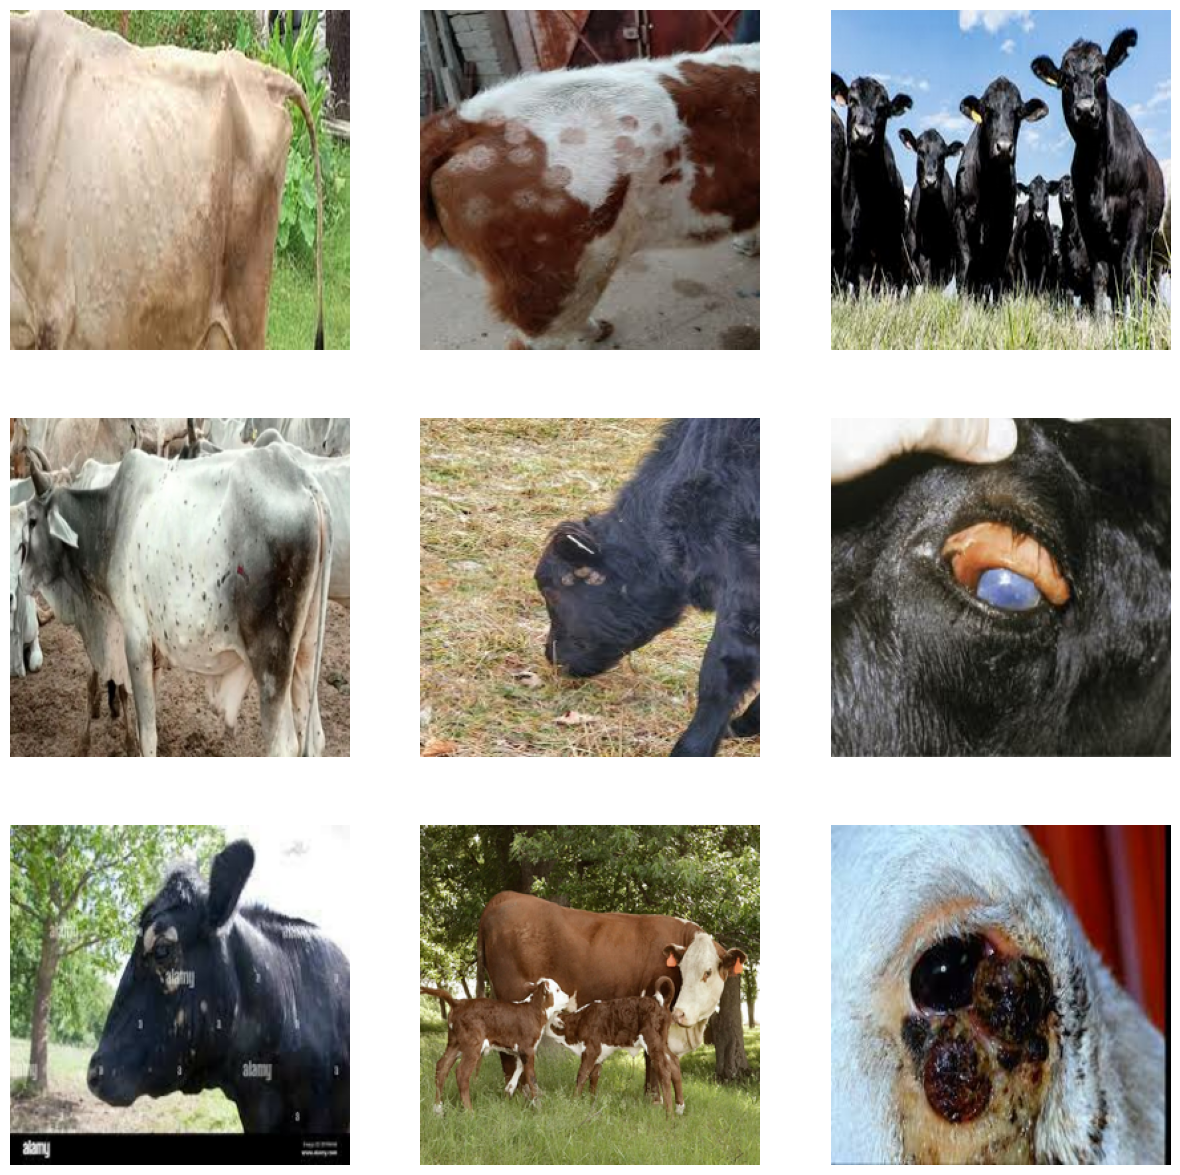

In [81]:
plt.figure(figsize=(15, 15))
for images,labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        actual_class = class_names[labels[i]]
        
        plt.axis('off')

In [82]:
model_name = "Cow Disease Detection Model_3"
model.save(f"../Deep_Learning_Models/{model_name}.keras")